波士顿房价数据集的简介
该数据集包含美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息, 数据集很小，只有506个案例。
该数据集是一个回归问题。每个类的观察值数量是均等的，共有 506 个观察，13 个输入变量和1个输出变量。

下载地址：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data 
或者： 使用sklearn.datasets.load_boston即可加载相关数据。

In [5]:
##用于可视化图表
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##用于做科学计算

##用于加载数据或生成数据等
from sklearn import datasets

###用于交叉验证以及训练集和测试集的划分
from sklearn.model_selection import train_test_split, cross_val_predict
###这个模块中含有评分函数，性能度量，距离计算等
from sklearn import metrics
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
print(type(boston))



<class 'sklearn.utils.Bunch'>


/Users/wanyongquan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = boston.data
print(type(data))

<class 'numpy.ndarray'>


In [6]:
print(data.ndim, data.shape, data.size)
print(boston["feature_names"])

2 (506, 13) 6578
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
X = boston.data
Y = boston.target

In [11]:
boston_X = boston.data   ##获得数据集中的输入
boston_y = boston.target ##获得数据集中的输出，即标签(也就是类别)
# 构造DataFrame对象；
boston_data = pd.DataFrame(boston_X)
boston_data.columns = boston.feature_names
boston_data["PRICE"]=boston_y
boston_data.head() # 查看前5条记录


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# 采用info查看数据集信息
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 散点图分析

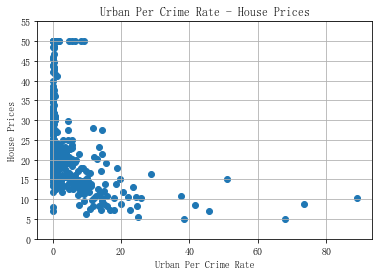

In [11]:
# 散点图分析
# 绘制变量CRIM和因变量的散点图
# 请补充代码


分析各特征与target的关联关系

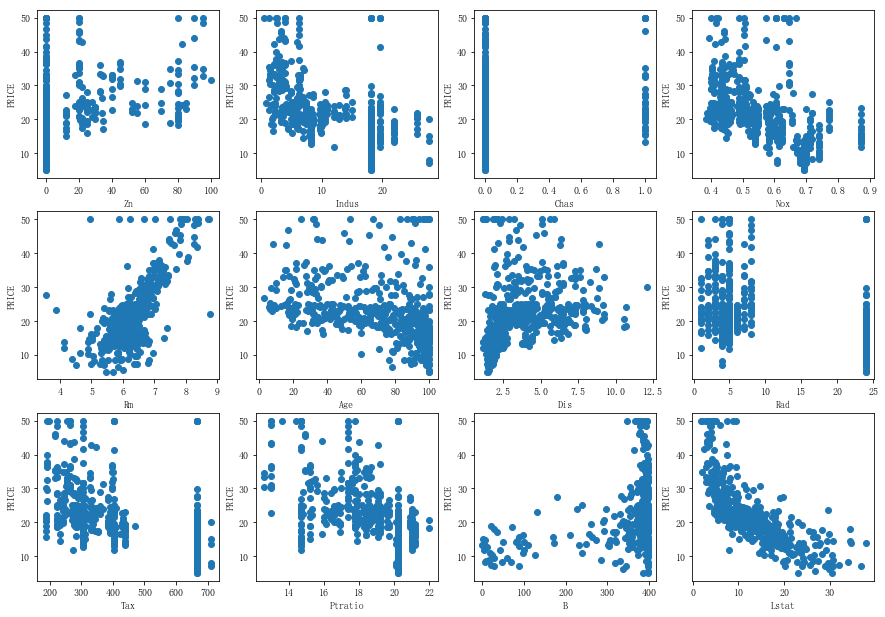

In [12]:
plt.figure(figsize=(15,10.5))
#  请补充代码
plt.show()


结论：

ZN表示住宅用地所占比例，从散点图可以看出，其与因变量target并没有明显的线性关系
INDUS表示城镇中非商业用地所占比例，当城镇中非商业用地所占比例处于(0,5)区间的情况下，房价不低于15
CHAS表示地产是否处于查尔斯河边，1表示在河边，0表示不在河边，地产不在查尔斯河边的情况下，房价处于(5,55)区间，地产在查尔斯河边的情况下，房价最低不低于10
NOX表示一氧化碳的浓度，整体看NOX与因变量target具有负的相关关系
RM表示每栋住宅的房间数，很明显两者之间存在较强的线性关系。
AGE表示1940年之前建成的业主自住单位的占比，自住单位的占比处于(0,60)的情况下，房价最底不会低于15.
DIS表示距离5个波士顿就业中心的平均距离，一般来说距离就业中心近则上下班距离近，人更愿意住在上下班距离近的地方，根据市场规律，需求高则房价会高，从散点图的数据分布来看，整体与因变量target呈负的相关关系。
RAD表示距离高速公路的接近指数，绝大多数房价高于30的房产，都集中在距离高速公路的接近指数低的地区。
TAX表示每一万美元的不动产产税率，在税率大于600的情况下，房价会低于10。
PTRATIO表示城镇中学生教师比例，学生教师比例小于14的情况下，房价最低不低于20，绝大部分高于30，只有在学生教师比例大于20的情况下，房价会低于10，绝大部分不高于30.
B表示城镇中黑人比例，在黑人比例高于350的地区，房价会高于30.
LSTAT表示低收入阶层占比，从散点图看，很明显与因变量target具有负的相关关系。


# 单元线性回归

In [39]:
data_X = boston_data[['RM']]
data_y = boston_data[['PRICE']]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [21]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
import datetime

In [22]:
##加载线性回归模型
model = LinearRegression()
##将训练数据传入开始训练

start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()


In [24]:
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
MSE is 38.040897702554844
RMSE is 6.167730352613905


In [25]:
print(model.coef_)     #系数，有些模型没有系数（如k近邻）
print(model.intercept_) #与y轴交点，即截距

[[9.74710854]]
[-38.63203244]


## 在测试集上的性能

In [28]:
y_pred = model.predict(X_test)
print("使用LinearRegression模型的均方误差为:",metrics.mean_squared_error(y_test, y_pred))
print("使用LinearRegression模型的均方根误差为:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

使用LinearRegression模型的均方误差为: 66.68011821636246
使用LinearRegression模型的均方根误差为: 8.165789503554599


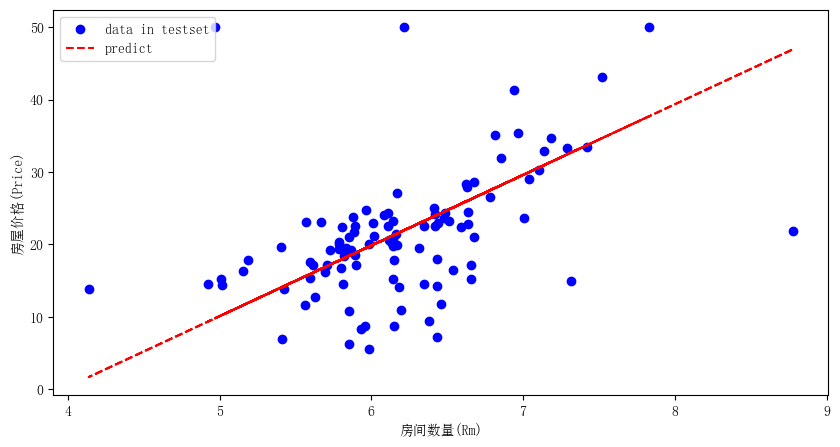

In [38]:
plt.figure(figsize=(10,5))
plt.rcParams['font.family']= ['SimSun']
plt.rcParams['axes.unicode_minus']= False
plt.scatter(X_test,y_test, c='blue', label='data in testset')
plt.plot(X_test,y_pred,'r--', label='predict')

plt.xlabel("房间数量(Rm)")
plt.ylabel("房屋价格(Price)")
plt.legend()
plt.show()

# 多元线性回归

可以选取其中几个特征来做训练。比如选取ZN，RM，PTRATIO，LSTAT作为输入特征，PRICE则是我们的输出


In [19]:
data_X=boston_data[['ZN','RM','PTRATIO','LSTAT']]
data_y=boston_data[['PRICE']]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 4)
(102, 4)
(404, 1)
(102, 1)


In [21]:
##加载线性回归模型
model=LinearRegression()
##将训练数据传入开始训练
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

我们可以打印系数和截距来看看这四个特征和输出的关系，


In [22]:
print(model.coef_)     #系数，有些模型没有系数（如k近邻）
print(model.intercept_) #与y轴交点，即截距

[[ 1.38794034e-03  4.53448558e+00 -1.08635063e+00 -5.09403454e-01]]
[20.54454346]


In [23]:
y_pred = model.predict(X_test)
print("使用LinearRegression模型的均方误差为:",metrics.mean_squared_error(y_test, y_pred))
print("使用LinearRegression模型的均方根误差为:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


使用LinearRegression模型的均方误差为: 40.72198050354283
使用LinearRegression模型的均方根误差为: 6.381377633673064


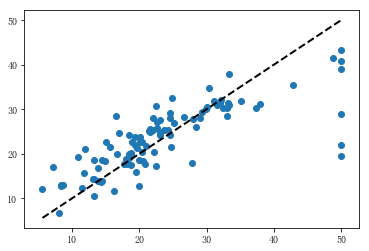

In [24]:
# 在测试集上画图并分析

plt.show()
